# Lecture 11 Mapping Shootings
- Name: Siddhant Oswal
- Division: B, Roll No.: 35

In [1]:
# Setup
import pandas as pd

In [2]:
# Importing the csv file in the notebook
shootings_df = pd.read_csv("Mass-Shooting-Data-2016.csv")
shootings_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


In [3]:
# 1st 10 rows
shootings_df.head(10)

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418
6,30-Oct-16,New York (Manhattan),New York,4,0,40.748436,-73.985693
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944
8,30-Oct-16,San Antonio,Texas,5,0,29.424600,-98.495140
9,29-Oct-16,Dayton,Ohio,3,1,39.758948,-84.191607


In [4]:
# Average_injuries and average killled by state and city

average_df = shootings_df.groupby(["state", "city"]).agg(average_injuries = ("injured","mean"),
                                                         average_killed = ("killed", "mean"))
average_df

average_injuries  average_killed
state         city                                                 
Alabama       Anniston                          4.0             0.0
              Auburn                            1.0             3.0
              Bessemer                          3.0             1.0
              Bessemer (Brighton)               6.0             1.0
              Birmingham                        4.0             1.0
...                                             ...             ...
Washington    Seattle                           3.0             2.0
              Tacoma                            5.0             0.0
              Woodland                          1.0             3.0
West Virginia Charleston                        3.0             1.0
Wisconsin     Milwaukee                         2.5             1.5

[194 rows x 2 columns]

In [5]:
# Total killed and total injured

total_df = shootings_df.groupby(["state", "city"]).agg(total_injuries = ("injured","sum"),
                                                         total_killed = ("killed", "sum"))
total_df

total_injuries  total_killed
state         city                                             
Alabama       Anniston                          4             0
              Auburn                            1             3
              Bessemer                          3             1
              Bessemer (Brighton)               6             1
              Birmingham                        4             1
...                                           ...           ...
Washington    Seattle                           3             2
              Tacoma                            5             0
              Woodland                          1             3
West Virginia Charleston                        3             1
Wisconsin     Milwaukee                         5             3

[194 rows x 2 columns]

In [6]:
total_df.sort_values("total_killed", ascending = False)

total_injuries  total_killed
state      city                                              
Florida    Orlando                           77            55
Illinois   Chicago                           87            11
Texas      Houston                           31            10
California Los Angeles                       36             8
Arizona    Glendale                           5             8
...                                         ...           ...
New York   New York (Manhattan)               8             0
           Elmira                             5             0
           Corona (Queens)                    4             0
           Brooklyn                          24             0
Alabama    Anniston                           4             0

[194 rows x 2 columns]

In [7]:
# Top 5 cities with the most killed
top_5_cities_killed = total_df.sort_values("total_killed", ascending = False).head(5)
top_5_cities_killed

,,total_injuries,total_killed
state,city,,
Florida,Orlando,77,55
Illinois,Chicago,87,11
Texas,Houston,31,10
California,Los Angeles,36,8
Arizona,Glendale,5,8


In [8]:
states_injuries = shootings_df.groupby("state").agg(injuries = ("injured","sum"))
most_injured_df = states_injuries.sort_values("injuries", ascending = False).head(5)
most_injured_df

,injuries
state,
Florida,169
California,155
Illinois,127
Texas,94
New York,57


In [9]:
total_killings = shootings_df.killed.sum()
total_killings

400

In [10]:
total_injuries = shootings_df.injured.sum()
total_injuries

1311

In [11]:
# create and print a variable that says that there were x injuries and y killings
killings_and_injuries = "In 2016 : total killings = "+str(total_killings)+", total injuries = "+str(total_injuries)+" due to mass shootings"
killings_and_injuries

'In 2016 : total killings = 400, total injuries = 1311 due to mass shootings'

In [12]:
city = shootings_df.groupby("city").agg(killed = ("killed", "mean"))
city = city.sort_values("killed", ascending = False)
city

,killed
city,
Orlando,11.0
Piketon,8.0
Chesapeake,6.0
Appling,6.0
Kalamazoo,6.0
...,...
New Bern,0.0
Nashville,0.0
Murfreesboro,0.0


In [13]:
city = shootings_df.groupby("city").agg(killed = ("killed", "sum"))
city = city.sort_values("killed", ascending = False)
city

,killed
city,
Orlando,55
Chicago,11
Houston,10
Los Angeles,8
Piketon,8
...,...
Miami Gardens,0
Marrero,0
Marlboro (county),0


In [14]:
shootings_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


## Taking another approach to filter cities that need help

In [15]:
x = shootings_df["victims"] = shootings_df["injured"] + shootings_df["killed"]

city_df = shootings_df.groupby(["state", "city"]).agg(total_victims = ("victims", "sum"),
                                                     total_incidents = ("city", "count"))

city_df["victims_per_incident"] = city_df["total_victims"]/city_df["total_incidents"]

z_index_df = city_df.loc[city_df["victims_per_incident"]>= 5].sort_values("victims_per_incident",
                                                                          ascending = False)

z_index_df

,,total_victims,total_incidents,victims_per_incident
state,city,,,
Florida,Orlando,132,5,26.4
Kansas,Hesston,18,1,18.0
California,Bakersfield,15,1,15.0
Connecticut,Bridgeport,13,1,13.0
Florida,Fort Myers,25,2,12.5
...,...,...,...,...
Alabama,Birmingham,5,1,5.0
Maryland,District Heights (Forestville),5,1,5.0
Michigan,Berrien (county),5,1,5.0


## Hoz Index
 - filter for incidents in which atleast 1 persom was killed
 - sort to see cities with the maximum incidents in which at least 1 person was killed

In [16]:
index = shootings_df.loc[shootings_df["killed"] > 0]
hoz_index = index.sort_values("killed", ascending = False)
hoz_index

,date,city,state,injured,killed,lat,lng,victims
187,12-Jun-16,Orlando,Florida,53,50,28.542117,-81.379046,103
245,22-Apr-16,Piketon,Ohio,0,8,39.068125,-83.014344,8
246,22-Apr-16,Appling,Georgia,0,6,31.777144,-82.299627,6
315,27-Jan-16,Chesapeake,Virginia,0,6,36.718371,-76.246680,6
299,20-Feb-16,Kalamazoo,Michigan,2,6,42.291707,-85.587228,8
...,...,...,...,...,...,...,...,...
189,11-Jun-16,Stockton,California,3,1,37.957702,-121.290779,4
183,14-Jun-16,Oakland,California,3,1,37.804456,-122.271356,4
179,18-Jun-16,Exmore,Virginia,3,1,37.531807,-75.822991,4
174,22-Jun-16,Dekalb (county),Georgia,4,1,33.757561,-84.218651,5


In [17]:
atleast_1_killed = shootings_df.loc[shootings_df["killed"]>0]
hoz_city_df = atleast_1_killed.groupby(["state","city"]).agg(total_incidents = ("city", "count"))
hoz_city_df.sort_values("total_incidents", ascending = False)

total_incidents
state      city                             
Illinois   Chicago                         8
Texas      Houston                         7
Florida    Miami                           4
California Los Angeles                     4
Florida    Orlando                         4
...                                      ...
Georgia    Jackson                         1
           Dekalb (county)                 1
           Decatur                         1
           Atlanta                         1
Maryland   District Heights                1

[128 rows x 1 columns]

## Kha index
- First find an average victims involved 
- only list the cities that exceed the average victims

In [18]:
shootings_df.describe()
city_df = shootings_df
city_df = city_df.loc[city_df["victims"]>5.26]
city_df

,date,city,state,injured,killed,lat,lng,victims
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418,7
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944,6
13,28-Oct-16,Jackson,Mississippi,6,0,32.410438,-90.162065,6
17,23-Oct-16,Wellston,Oklahoma,5,1,35.694228,-97.063363,6
18,22-Oct-16,Oakland,California,7,0,37.804456,-122.271356,7
22,15-Oct-16,Los Angeles,California,11,4,34.054394,-118.243941,15
23,15-Oct-16,Rockford,Illinois,5,1,42.271394,-89.093966,6
24,14-Oct-16,Chicago,Illinois,6,1,41.875555,-87.624421,7
26,9-Oct-16,Grand Rapids,Michigan,8,1,42.963240,-85.667864,9


In [19]:
shootings_df

,date,city,state,injured,killed,lat,lng,victims
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194,4
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728,4
...,...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646,4
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4


## Data visualization

In [20]:
#setup
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
bar_chart = shootings_df.groupby(["state", "city"]).agg(killed = ("killed", "sum")).sort_values("killed", ascending = False).head(5).reset_index()
bar_chart

,state,city,killed
0,Florida,Orlando,55
1,Illinois,Chicago,11
2,Texas,Houston,10
3,California,Los Angeles,8
4,Arizona,Glendale,8


<AxesSubplot:xlabel='city', ylabel='killed'>

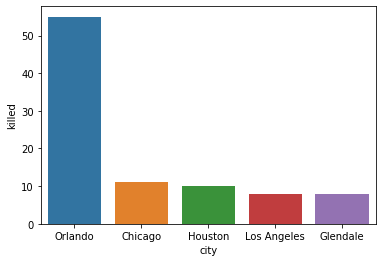

In [22]:
sns.barplot(x = "city", y = "killed", data = bar_chart)

<AxesSubplot:xlabel='state', ylabel='injured'>

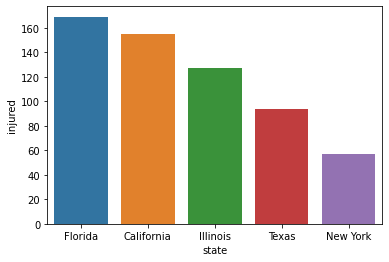

In [23]:
bar_chart_df = shootings_df.groupby(["state"]).agg(injured = ("injured", "sum")).sort_values("injured", ascending = False).head(5).reset_index()
sns.barplot(x = "state", y = "injured", data = bar_chart_df)

<AxesSubplot:xlabel='state', ylabel='injured'>

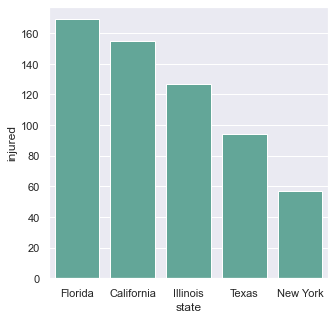

In [24]:
sns.set(rc = {'figure.figsize' : (5, 5)})
sns.barplot(x = "state", y = "injured", data = bar_chart_df, color = "#58B19F")